## Support vector machine -- SVM

The main idea of SVM is finding the hyperplane that gives the largest distance to the training examples, in other words, maximize the margin.

**Support vectors** -- the training examples that are closest to the hyperplane.

#### Example of SVM
Here we use a schematic plot to show the idea of 'maximize the margin'.

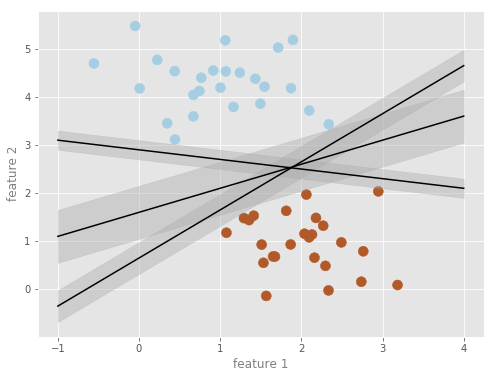

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('feature 1', color='gray')
ax.set_ylabel('feature 2', color='gray')

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='Paired')

xfit = np.linspace(-1, 4)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    ax.plot(xfit, yfit, '-k')
    ax.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)


#### Penalty parameter C
The penalty parameter C indicates the "hardness" of the margin.<br> 
For a very large C, the margin is hard, and data points cannot get into the margin. 
For smaller C, the margin become soften, it allows some of the points to creep into the margin for a better fit. <br>
The following example shows how a changing penalty parameter C affects model.

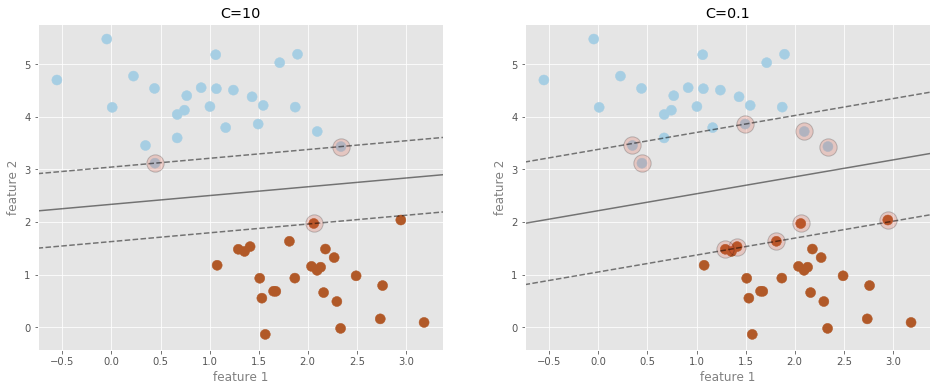

In [64]:
from sklearn.svm import SVC # "Support vector classifier"

def plot_svm(ax, k, c, t):
    X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
    
    clf = SVC(kernel=k, C=c)
    clf.fit(X, y)

    ax.set_title(t)
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='Paired')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    P = clf.decision_function(xy).reshape(xx.shape)
    
    ax.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, linewidth=1, alpha=.2, edgecolors='black')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_svm(ax[0], 'linear', 10, 'C=10')
plot_svm(ax[1], 'linear', 0.1, 'C=0.1')


#### Kernel
In Scikit learn, the default setting of kernel is actually RBF (radial basis function) kernel.<br>
Here we compare two cases with different non-linear kernel -- rbf vs. poly.

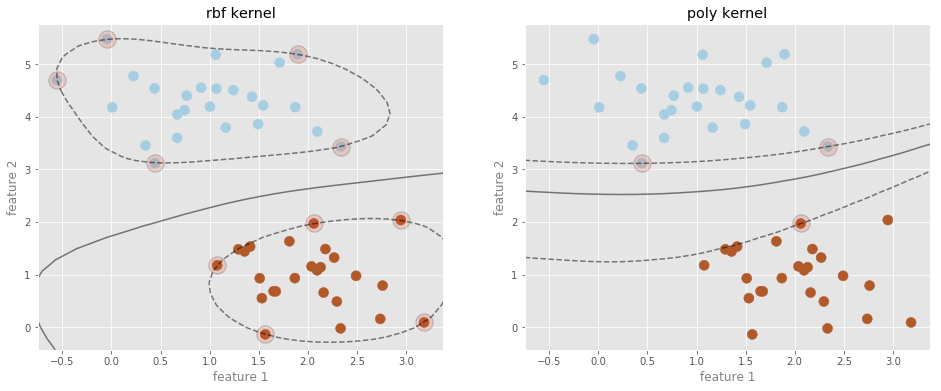

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_svm(ax[0], 'rbf', 10, 'rbf kernel')
plot_svm(ax[1], 'poly', 10, 'poly kernel')

In [7]:
import numpy as np

X = np.array([[1, 2],
              [2, 3],
              [3, 4]])

def kernel(x1, x2):
    return np.inner(x1, x2)

print(kernel([1,2],[2,3]))

n_samples = 3
kernel_matrix = np.zeros((n_samples, n_samples))

print(kernel_matrix)

for i in range(n_samples):
    for j in range(n_samples):
        kernel_matrix[i, j] = kernel(X[i], X[j])
        
print(kernel_matrix)

8
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[  5.   8.  11.]
 [  8.  13.  18.]
 [ 11.  18.  25.]]
